In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('Datasets/exercises.csv')

In [4]:
data.head()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles/0,secondaryMuscles/1,instructions/0,instructions/1,...,instructions/5,secondaryMuscles/2,instructions/6,instructions/7,secondaryMuscles/3,instructions/8,secondaryMuscles/4,instructions/9,secondaryMuscles/5,instructions/10
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,1,3/4 sit-up,abs,hip flexors,lower back,Lie flat on your back with your knees bent and...,Place your hands behind your head with your el...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,2,45° side bend,abs,obliques,NaN,Stand with your feet shoulder-width apart and ...,Keeping your back straight and your core engag...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,3,air bike,abs,hip flexors,NaN,Lie flat on your back with your hands placed b...,Lift your legs off the ground and bend your kn...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,1512,all fours squad stretch,quads,hamstrings,glutes,Start on all fours with your hands directly un...,"Extend one leg straight back, keeping your kne...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,6,alternate heel touchers,abs,obliques,NaN,Lie flat on your back with your knees bent and...,"Extend your arms straight out to the sides, pa...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(1324, 23)

In [6]:
data.isnull()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles/0,secondaryMuscles/1,instructions/0,instructions/1,...,instructions/5,secondaryMuscles/2,instructions/6,instructions/7,secondaryMuscles/3,instructions/8,secondaryMuscles/4,instructions/9,secondaryMuscles/5,instructions/10
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1320,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,True,True,True,True
1321,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
1322,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [7]:
data.isnull().sum()

bodyPart                 0
equipment                0
gifUrl                   0
id                       0
name                     0
target                   0
secondaryMuscles/0       0
secondaryMuscles/1     338
instructions/0           0
instructions/1           0
instructions/2           0
instructions/3           0
instructions/4          82
instructions/5         585
secondaryMuscles/2    1091
instructions/6        1011
instructions/7        1232
secondaryMuscles/3    1292
instructions/8        1304
secondaryMuscles/4    1320
instructions/9        1319
secondaryMuscles/5    1322
instructions/10       1321
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bodyPart            1324 non-null   object
 1   equipment           1324 non-null   object
 2   gifUrl              1324 non-null   object
 3   id                  1324 non-null   int64 
 4   name                1324 non-null   object
 5   target              1324 non-null   object
 6   secondaryMuscles/0  1324 non-null   object
 7   secondaryMuscles/1  986 non-null    object
 8   instructions/0      1324 non-null   object
 9   instructions/1      1324 non-null   object
 10  instructions/2      1324 non-null   object
 11  instructions/3      1324 non-null   object
 12  instructions/4      1242 non-null   object
 13  instructions/5      739 non-null    object
 14  secondaryMuscles/2  233 non-null    object
 15  instructions/6      313 non-null    object
 16  instructions/7      92 n

<Axes: >

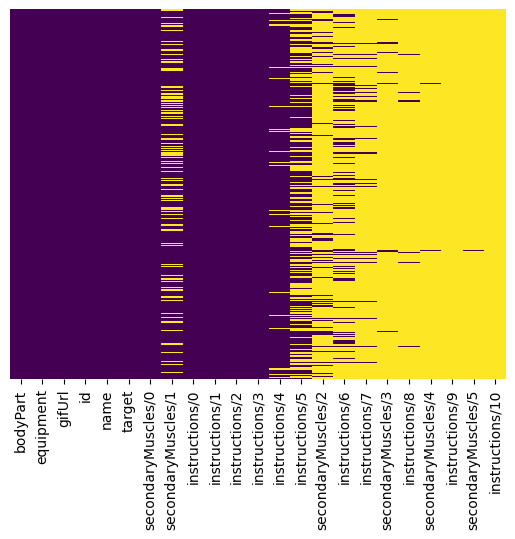

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
selected_columns = ['secondaryMuscles/0', 'secondaryMuscles/1', 'secondaryMuscles/2', 'secondaryMuscles/3', 'secondaryMuscles/4', 'secondaryMuscles/5']

data['secondaryMuscles'] = data[selected_columns].apply(lambda x: ', '.join(x.dropna().astype(str)), axis=1)

In [11]:
data.drop(columns=selected_columns, inplace=True)

In [12]:
data.head()

,bodyPart,equipment,gifUrl,id,name,target,instructions/0,instructions/1,instructions/2,instructions/3,instructions/4,instructions/5,instructions/6,instructions/7,instructions/8,instructions/9,instructions/10,secondaryMuscles
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,1,3/4 sit-up,abs,Lie flat on your back with your knees bent and...,Place your hands behind your head with your el...,"Engaging your abs, slowly lift your upper body...","Pause for a moment at the top, then slowly low...",Repeat for the desired number of repetitions.,NaN,NaN,NaN,NaN,NaN,NaN,"hip flexors, lower back"
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,2,45° side bend,abs,Stand with your feet shoulder-width apart and ...,Keeping your back straight and your core engag...,"Pause for a moment at the bottom, then slowly ...",Repeat on the other side.,Continue alternating sides for the desired num...,NaN,NaN,NaN,NaN,NaN,NaN,obliques
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,3,air bike,abs,Lie flat on your back with your hands placed b...,Lift your legs off the ground and bend your kn...,Bring your right elbow towards your left knee ...,Return to the starting position and repeat the...,Continue alternating sides in a pedaling motio...,NaN,NaN,NaN,NaN,NaN,NaN,hip flexors
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,1512,all fours squad stretch,quads,Start on all fours with your hands directly un...,"Extend one leg straight back, keeping your kne...","Slowly lower your hips towards the ground, fee...",Hold this position for 20-30 seconds.,Switch legs and repeat the stretch on the othe...,NaN,NaN,NaN,NaN,NaN,NaN,"hamstrings, glutes"
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,6,alternate heel touchers,abs,Lie flat on your back with your knees bent and...,"Extend your arms straight out to the sides, pa...","Engaging your abs, lift your shoulders off the...",Return to the starting position and repeat on ...,Continue alternating sides for the desired num...,NaN,NaN,NaN,NaN,NaN,NaN,obliques


<Axes: >

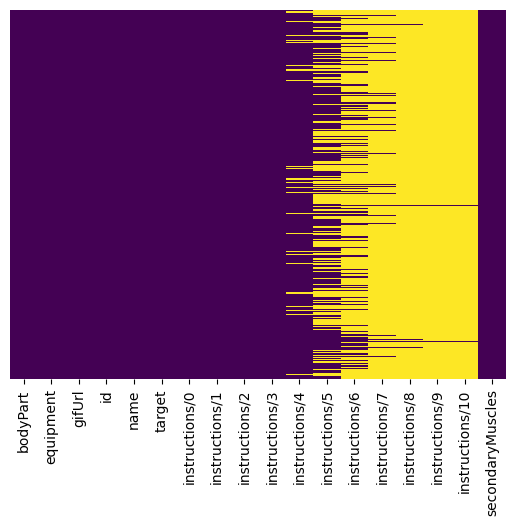

In [13]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
selected_columns = ['instructions/0', 'instructions/1', 'instructions/2', 'instructions/3', 'instructions/4', 'instructions/5', 'instructions/6', 'instructions/7', 'instructions/8', 'instructions/9', 'instructions/10']

data['instructions'] = data[selected_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [15]:
data.head()

,bodyPart,equipment,gifUrl,id,name,target,instructions/0,instructions/1,instructions/2,instructions/3,instructions/4,instructions/5,instructions/6,instructions/7,instructions/8,instructions/9,instructions/10,secondaryMuscles,instructions
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,1,3/4 sit-up,abs,Lie flat on your back with your knees bent and...,Place your hands behind your head with your el...,"Engaging your abs, slowly lift your upper body...","Pause for a moment at the top, then slowly low...",Repeat for the desired number of repetitions.,NaN,NaN,NaN,NaN,NaN,NaN,"hip flexors, lower back",Lie flat on your back with your knees bent and...
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,2,45° side bend,abs,Stand with your feet shoulder-width apart and ...,Keeping your back straight and your core engag...,"Pause for a moment at the bottom, then slowly ...",Repeat on the other side.,Continue alternating sides for the desired num...,NaN,NaN,NaN,NaN,NaN,NaN,obliques,Stand with your feet shoulder-width apart and ...
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,3,air bike,abs,Lie flat on your back with your hands placed b...,Lift your legs off the ground and bend your kn...,Bring your right elbow towards your left knee ...,Return to the starting position and repeat the...,Continue alternating sides in a pedaling motio...,NaN,NaN,NaN,NaN,NaN,NaN,hip flexors,Lie flat on your back with your hands placed b...
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,1512,all fours squad stretch,quads,Start on all fours with your hands directly un...,"Extend one leg straight back, keeping your kne...","Slowly lower your hips towards the ground, fee...",Hold this position for 20-30 seconds.,Switch legs and repeat the stretch on the othe...,NaN,NaN,NaN,NaN,NaN,NaN,"hamstrings, glutes",Start on all fours with your hands directly un...
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,6,alternate heel touchers,abs,Lie flat on your back with your knees bent and...,"Extend your arms straight out to the sides, pa...","Engaging your abs, lift your shoulders off the...",Return to the starting position and repeat on ...,Continue alternating sides for the desired num...,NaN,NaN,NaN,NaN,NaN,NaN,obliques,Lie flat on your back with your knees bent and...


In [16]:
data.drop(columns=selected_columns, inplace=True)

In [17]:
data.head()

,bodyPart,equipment,gifUrl,id,name,target,secondaryMuscles,instructions
0,waist,body weight,https://v2.exercisedb.io/image/MOnK4iG0MEt9h8,1,3/4 sit-up,abs,"hip flexors, lower back",Lie flat on your back with your knees bent and...
1,waist,body weight,https://v2.exercisedb.io/image/PERWLDGUxVbpHS,2,45° side bend,abs,obliques,Stand with your feet shoulder-width apart and ...
2,waist,body weight,https://v2.exercisedb.io/image/PLr4yo3j-f1amp,3,air bike,abs,hip flexors,Lie flat on your back with your hands placed b...
3,upper legs,body weight,https://v2.exercisedb.io/image/XPQwM7HECjgNFE,1512,all fours squad stretch,quads,"hamstrings, glutes",Start on all fours with your hands directly un...
4,waist,body weight,https://v2.exercisedb.io/image/5nYph4eUGNiEdf,6,alternate heel touchers,abs,obliques,Lie flat on your back with your knees bent and...


<Axes: >

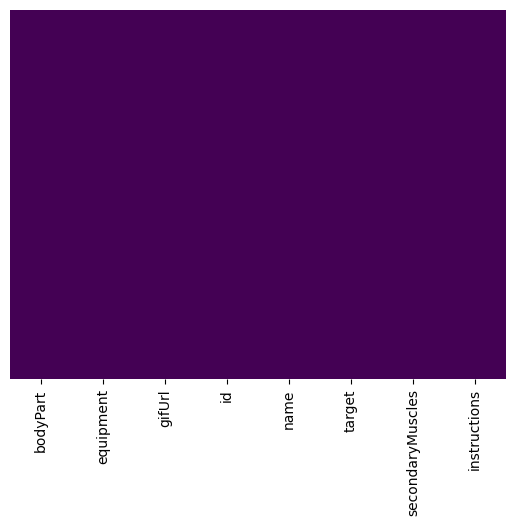

In [18]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bodyPart          1324 non-null   object
 1   equipment         1324 non-null   object
 2   gifUrl            1324 non-null   object
 3   id                1324 non-null   int64 
 4   name              1324 non-null   object
 5   target            1324 non-null   object
 6   secondaryMuscles  1324 non-null   object
 7   instructions      1324 non-null   object
dtypes: int64(1), object(7)
memory usage: 82.9+ KB


In [20]:
data.drop(columns='id', inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bodyPart          1324 non-null   object
 1   equipment         1324 non-null   object
 2   gifUrl            1324 non-null   object
 3   name              1324 non-null   object
 4   target            1324 non-null   object
 5   secondaryMuscles  1324 non-null   object
 6   instructions      1324 non-null   object
dtypes: object(7)
memory usage: 72.5+ KB


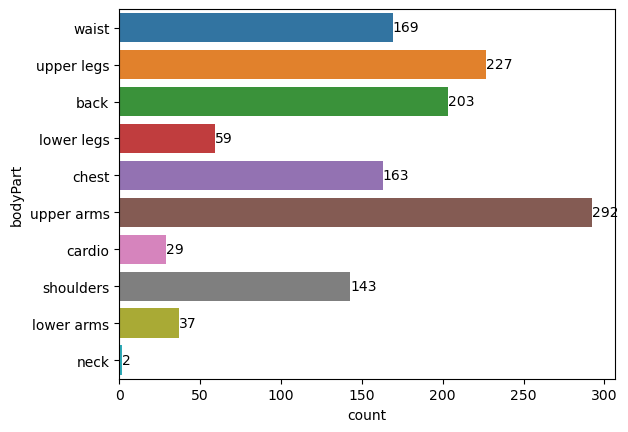

In [22]:
ax = sns.countplot(data=data,y='bodyPart')
ax.bar_label(ax.containers[0])
plt.show()

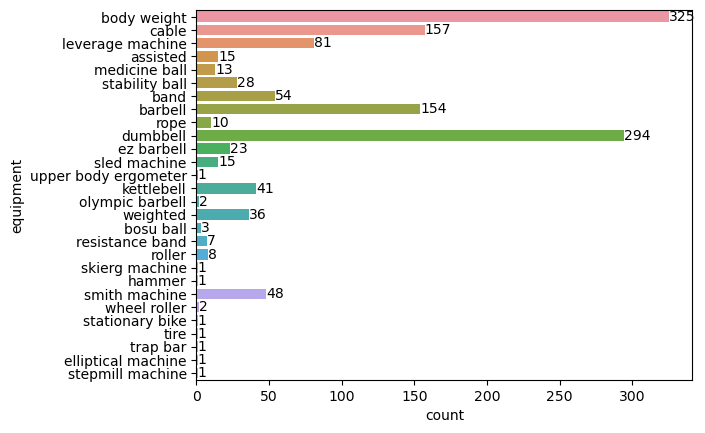

In [23]:
ax = sns.countplot(data=data,y='equipment')
ax.bar_label(ax.containers[0])
plt.show()

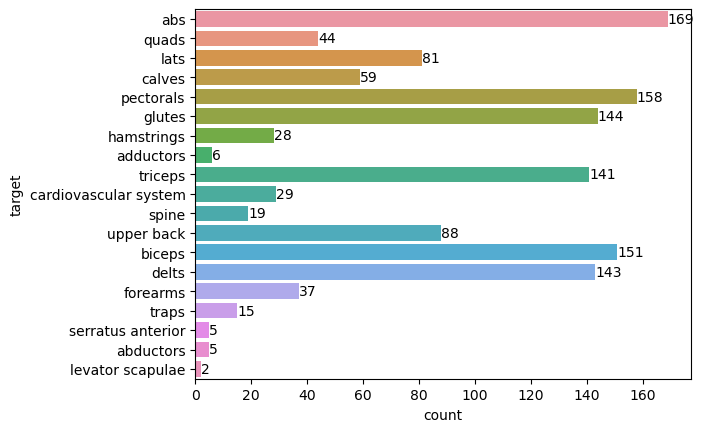

In [24]:
ax = sns.countplot(data=data,y='target')
ax.bar_label(ax.containers[0])
plt.show()

In [25]:
label_encoders = {}
for column in ['bodyPart', 'equipment', 'target']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

X = data[['bodyPart', 'equipment', 'target']]
y = data[['name', 'secondaryMuscles', 'instructions', 'gifUrl']]

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

RandomForestClassifier()

In [26]:
def classify_exercise(body_part, equipment, target):
    body_part_encoded = label_encoders['bodyPart'].transform([body_part])[0]
    equipment_encoded = label_encoders['equipment'].transform([equipment])[0]
    target_encoded = label_encoders['target'].transform([target])[0]

    predicted_values = rf_classifier.predict([[body_part_encoded, equipment_encoded, target_encoded]])

    return predicted_values[0]

In [27]:
def get_user_inputs():
    user_body_part = input("Enter the body part (e.g., waist, upper legs): ")
    user_equipment = input("Enter the equipment (e.g., body weight, dumbbell): ")
    user_target = input("Enter the target (e.g., abs, quads): ")
    return user_body_part, user_equipment, user_target

# Loop to repeat the process
while True:
    user_body_part, user_equipment, user_target = get_user_inputs()

    # Pass user inputs to classify_exercise function without encoding
    predicted_exercise = classify_exercise(user_body_part, user_equipment, user_target)
    print("Predicted exercise:", predicted_exercise)

    # Ask if the user wants to repeat the process
    repeat = input("Do you want to classify another exercise? (yes/no): ")
    if repeat.lower() != 'yes':
        break